In [1]:
pip install neuprint-python

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 767.2 kB/s eta 0:00:00:010:00:01
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=91902484aa370c6d812df18527e3575187d744335c16b61f05c05c0455d21769
  Stored in directory: /Users/maitreyasameerganu/Library/Caches/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree
Note: you may need to restart the kernel to use updated packages.


   Unnamed: 0 Origin Muscle  Number of Connections Neurotransmitter
0           0   ADEL  MDL05                    1.0              exc
1           1    AS1  MDL05                    1.0              exc
2           2    AS1  MDR05                    1.0              exc
3           3    AS1  MDL08                    1.0              exc
4           4    AS1  MDR08                    1.0              exc
Modularity: 0.751624911662536


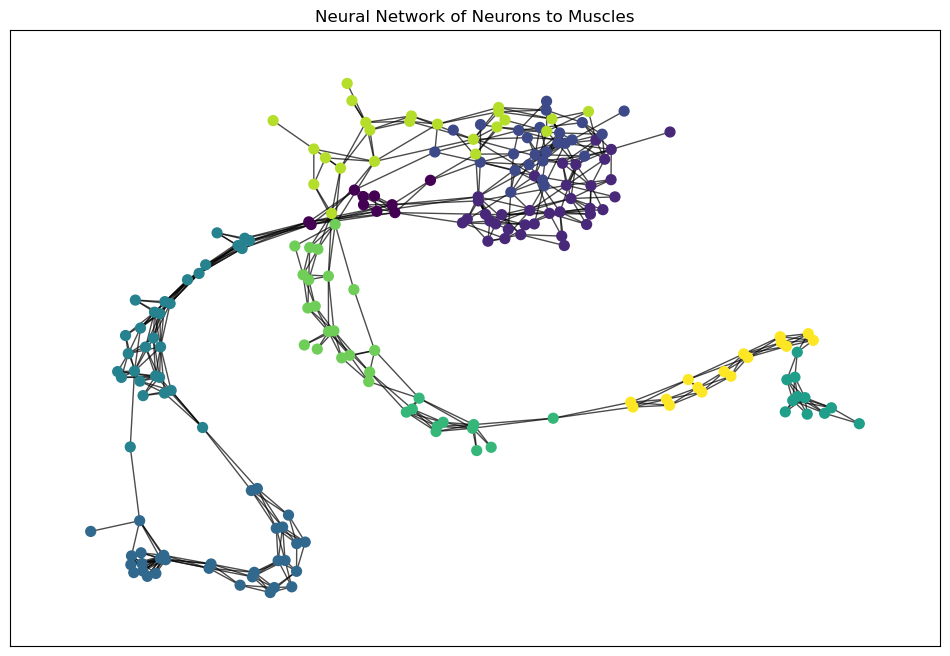

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain  # For modularity calculation

# Load the CSV file
file_path = "/Users/maitreyasameerganu/Desktop/Neurons_to_Muscles.csv"  # Path to your file
data = pd.read_csv(file_path)

# Check the first few rows of the data to verify the content
print(data.head())

# Create a graph
G = nx.Graph()

# Add edges with weights (from "Number of Connections" column)
for _, row in data.iterrows():
    G.add_edge(row['Origin'], row['Muscle'], weight=row['Number of Connections'])

# Calculate modularity and communities using Louvain method
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

# Add community as a node attribute
nx.set_node_attributes(G, partition, 'community')

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes for visualization
colors = [partition[node] for node in G.nodes()]  # Node colors based on community

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.viridis, node_color=colors)
nx.draw_networkx_edges(G, pos, alpha=0.7)

# Display the plot
plt.title("Neural Network of Neurons to Muscles")
plt.show()


Modularity: 0.5425843783237081


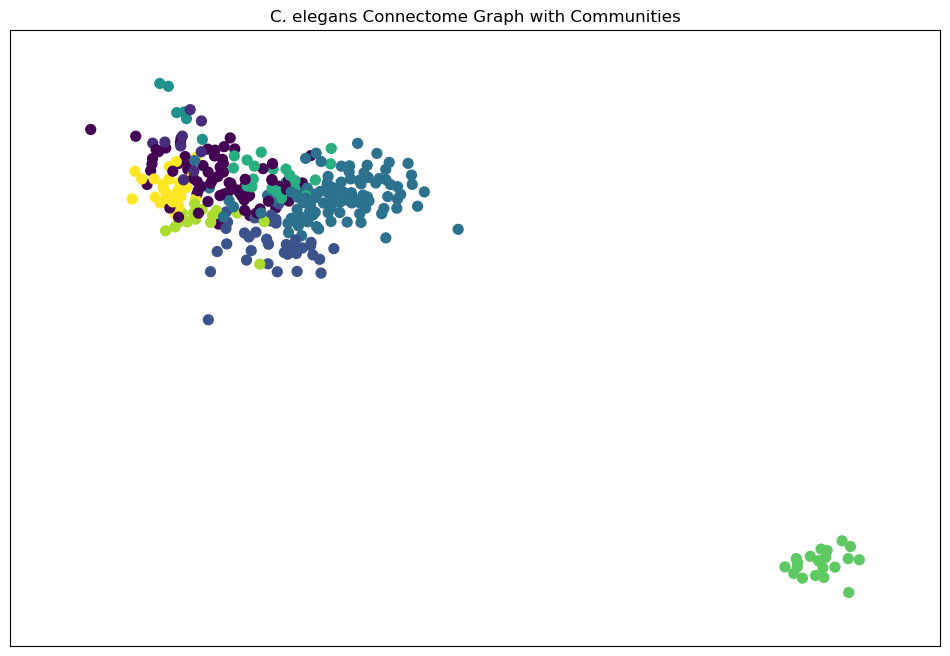

In [5]:


# Load the CSV file
# Ensure the CSV contains columns: 'Source', 'Target', 'Weight' (optional)
#file_path = "/Users/maitreyasameerganu/Desktop/Connectome.csv"  # Replace with the actual file path
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from community import community_louvain  # For modularity calculation

# Load the CSV file
file_path = "/Users/maitreyasameerganu/Desktop/Connectome.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges with weights if 'Number of Connections' is provided
for _, row in data.iterrows():
    G.add_edge(row['Neuron'], row['Target'], weight=row['Number of Connections'])

# Calculate modularity and communities using Louvain method
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

# Add community as a node attribute
nx.set_node_attributes(G, partition, 'community')

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes for visualization
colors = [partition[node] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.viridis, node_color=colors)
nx.draw_networkx_edges(G, pos, alpha=0)
plt.title("C. elegans Connectome Graph with Communities")
plt.show()


Modularity: 0.7577031927564939


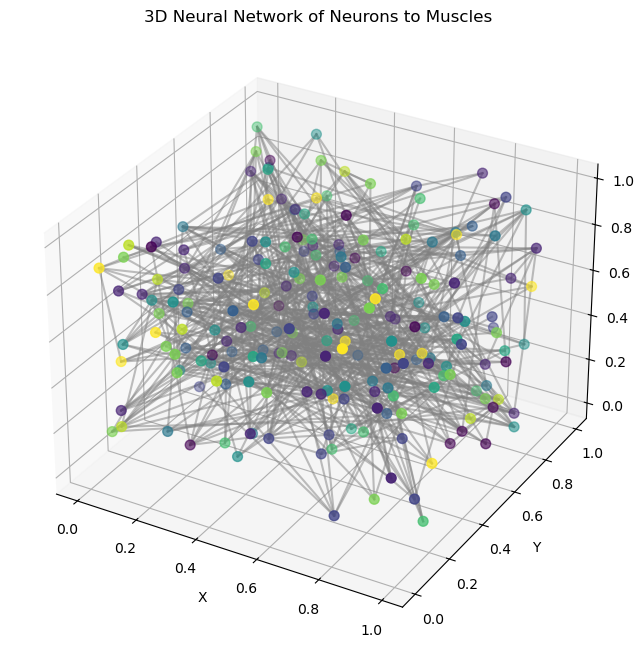

In [7]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from community import community_louvain  # For modularity calculation
import numpy as np

# Load the CSV file
file_path = "/Users/maitreyasameerganu/Desktop/Neurons_to_Muscles.csv"  # Path to your file
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges with weights (from "Number of Connections" column)
for _, row in data.iterrows():
    G.add_edge(row['Origin'], row['Muscle'], weight=row['Number of Connections'])

# Calculate modularity and communities using Louvain method
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

# Add community as a node attribute
nx.set_node_attributes(G, partition, 'community')

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate positions for nodes in 3D space
pos = {node: np.random.rand(3) for node in G.nodes()}  # Random positions for visualization
colors = [partition[node] for node in G.nodes()]  # Node colors based on community

# Draw the edges
for edge in G.edges():
    x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
    y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
    z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)  # Plot edges

# Draw the nodes
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]
node_z = [pos[node][2] for node in G.nodes()]
ax.scatter(node_x, node_y, node_z, c=colors, cmap=plt.cm.viridis, s=50)  # Plot nodes

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the plot
plt.title("3D Neural Network of Neurons to Muscles")
plt.show()


Modularity: 0.7484265148423529


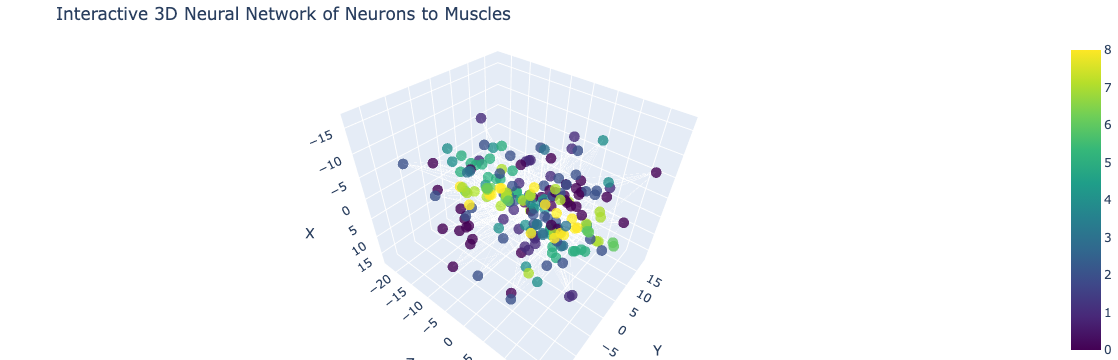

In [10]:
import networkx as nx
import pandas as pd
import plotly.graph_objects as go
from community import community_louvain
import numpy as np

# Load the CSV file
file_path = "/Users/maitreyasameerganu/Desktop/Neurons_to_Muscles.csv"  # Path to your file
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges with weights (from "Number of Connections" column)
for _, row in data.iterrows():
    G.add_edge(row['Origin'], row['Muscle'], weight=row['Number of Connections'])

# Calculate modularity and communities using Louvain method
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

# Add community as a node attribute
nx.set_node_attributes(G, partition, 'community')

# Generate positions for nodes in 3D space using a force-directed layout adapted for 3D
pos_2d = nx.spring_layout(G, seed=42)  # 2D spring layout
pos_3d = {node: np.array([pos_2d[node][0], pos_2d[node][1], np.random.rand()]) for node in G.nodes()}

# Apply force-directed layout in 3D
for _ in range(500):  # Number of iterations for optimization
    for node in G.nodes():
        forces = np.zeros(3)
        for neighbor in G.neighbors(node):
            # Calculate repulsive forces (spring-like)
            delta = pos_3d[node] - pos_3d[neighbor]
            distance = np.linalg.norm(delta)
            if distance > 0:
                forces += delta / distance  # Repulsion force

        # Move the node based on the force calculated
        pos_3d[node] += forces / len(G.nodes())

# Prepare the 3D scatter plot data
x_nodes = [pos_3d[node][0] for node in G.nodes()]
y_nodes = [pos_3d[node][1] for node in G.nodes()]
z_nodes = [pos_3d[node][2] for node in G.nodes()]
colors = [partition[node] for node in G.nodes()]  # Color by community

# Create the Plotly scatter plot
node_trace = go.Scatter3d(
    x=x_nodes,
    y=y_nodes,
    z=z_nodes,
    mode='markers',
    marker=dict(
        showscale=True,
        colorscale='Viridis',  # Color map for community groups
        color=colors,
        size=6,
        opacity=0.8
    )
)

# Prepare edges for Plotly 3D visualization
edge_x = []
edge_y = []
edge_z = []
for edge in G.edges():
    x0, y0, z0 = pos_3d[edge[0]]
    x1, y1, z1 = pos_3d[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

# Create the Plotly edges line plot (opacity handled with RGBA color)
edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='rgba(169,169,169,0.5)', width=0.5)  # Setting opacity through RGBA value
)

# Create the figure with both nodes and edges
fig = go.Figure(data=[edge_trace, node_trace])

# Update the layout for better visuals
fig.update_layout(
    title="Interactive 3D Neural Network of Neurons to Muscles",
    showlegend=False,
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()


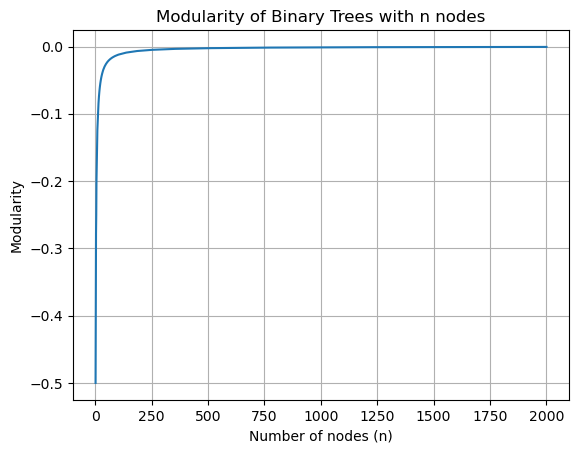

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import modularity

# Function to generate a binary tree with n nodes
def generate_binary_tree(n):
    G = nx.Graph()
    G.add_node(0)  # Root node
    nodes = [0]
    for i in range(1, n):
        parent = nodes[(i - 1) // 2]  # Parent of node i in binary tree
        G.add_edge(i, parent)  # Add edge between node i and its parent
        nodes.append(i)
    return G

# Function to calculate modularity for a binary tree
def calculate_modularity(G):
    # Since it's a binary tree, we use each node as its own community
    communities = [{node} for node in G.nodes()]
    return modularity(G, communities)

# Generate modularity values for different n
n_values = range(2, 2001)  # Vary n from 2 to 20
modularity_values = []

for n in n_values:
    tree = generate_binary_tree(n)
    mod = calculate_modularity(tree)
    modularity_values.append(mod)

# Plot modularity vs. number of nodes
plt.plot(n_values, modularity_values)
plt.title('Modularity of Binary Trees with n nodes')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Modularity')
plt.grid(True)
plt.show()


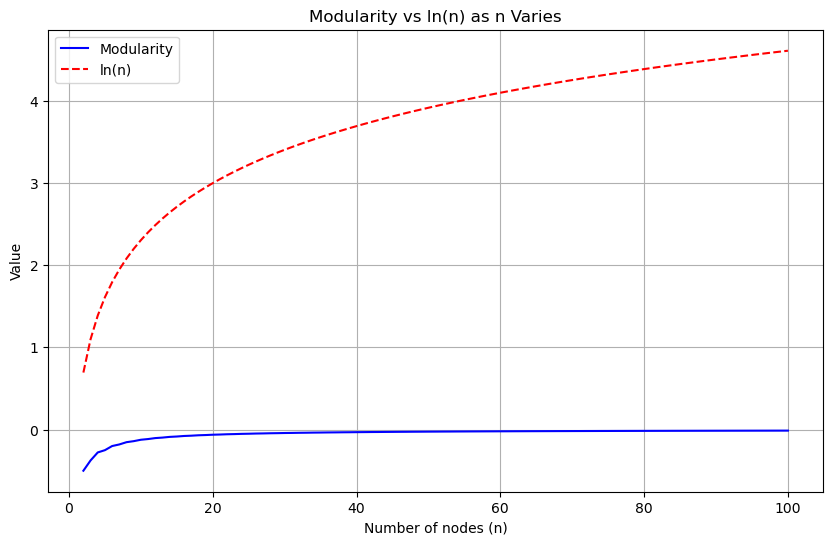

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import modularity

# Function to generate a binary tree with n nodes
def generate_binary_tree(n):
    G = nx.Graph()
    G.add_node(0)  # Root node
    nodes = [0]
    for i in range(1, n):
        parent = nodes[(i - 1) // 2]  # Parent of node i in binary tree
        G.add_edge(i, parent)  # Add edge between node i and its parent
        nodes.append(i)
    return G

# Function to calculate modularity for a binary tree
def calculate_modularity(G):
    # Since it's a binary tree, we use each node as its own community
    communities = [{node} for node in G.nodes()]
    return modularity(G, communities)

# Range for n
n_values = range(2, 101)  # You can adjust this range for larger n
modularity_values = []
ln_values = []

# Calculate modularity and ln(n) for each n
for n in n_values:
    tree = generate_binary_tree(n)
    mod = calculate_modularity(tree)
    modularity_values.append(mod)
    ln_values.append(np.log(n))

# Plot both functions
plt.figure(figsize=(10, 6))
plt.plot(n_values, modularity_values, label="Modularity", color="b")
plt.plot(n_values, ln_values, label="ln(n)", color="r", linestyle="--")
plt.title('Modularity vs ln(n) as n Varies')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


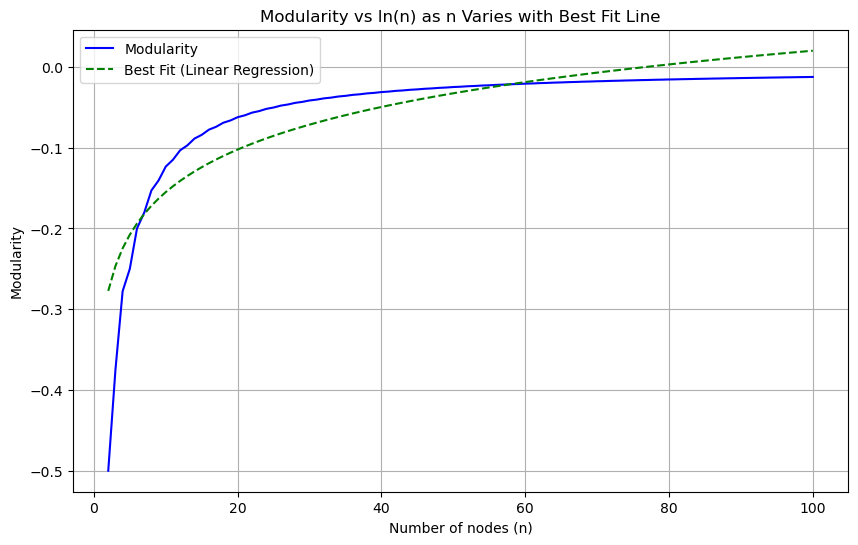

Linear Regression Parameters: Intercept = -0.3300679994428113, Coefficient = 0.07600790836829623


In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from networkx.algorithms.community import modularity

# Function to generate a binary tree with n nodes
def generate_binary_tree(n):
    G = nx.Graph()
    G.add_node(0)  # Root node
    nodes = [0]
    for i in range(1, n):
        parent = nodes[(i - 1) // 2]  # Parent of node i in binary tree
        G.add_edge(i, parent)  # Add edge between node i and its parent
        nodes.append(i)
    return G

# Function to calculate modularity for a binary tree
def calculate_modularity(G):
    # Since it's a binary tree, we use each node as its own community
    communities = [{node} for node in G.nodes()]
    return modularity(G, communities)

# Range for n
n_values = range(2, 101)  # You can adjust this range for larger n
modularity_values = []
ln_values = []

# Calculate modularity and ln(n) for each n
for n in n_values:
    tree = generate_binary_tree(n)
    mod = calculate_modularity(tree)
    modularity_values.append(mod)
    ln_values.append(np.log(n))

# Reshape data for regression model
X = np.array(ln_values).reshape(-1, 1)  # Independent variable (ln(n))
y = np.array(modularity_values)  # Dependent variable (modularity)

# Apply Linear Regression
regressor = LinearRegression()
regressor.fit(X, y)

# Predict modularity using the regression model
y_pred = regressor.predict(X)

# Plot both functions
plt.figure(figsize=(10, 6))
plt.plot(n_values, modularity_values, label="Modularity", color="b")
plt.plot(n_values, y_pred, label="Best Fit (Linear Regression)", color="g", linestyle="--")
plt.title('Modularity vs ln(n) as n Varies with Best Fit Line')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Modularity')
plt.legend()
plt.grid(True)
plt.show()

# Display regression parameters
print(f"Linear Regression Parameters: Intercept = {regressor.intercept_}, Coefficient = {regressor.coef_[0]}")


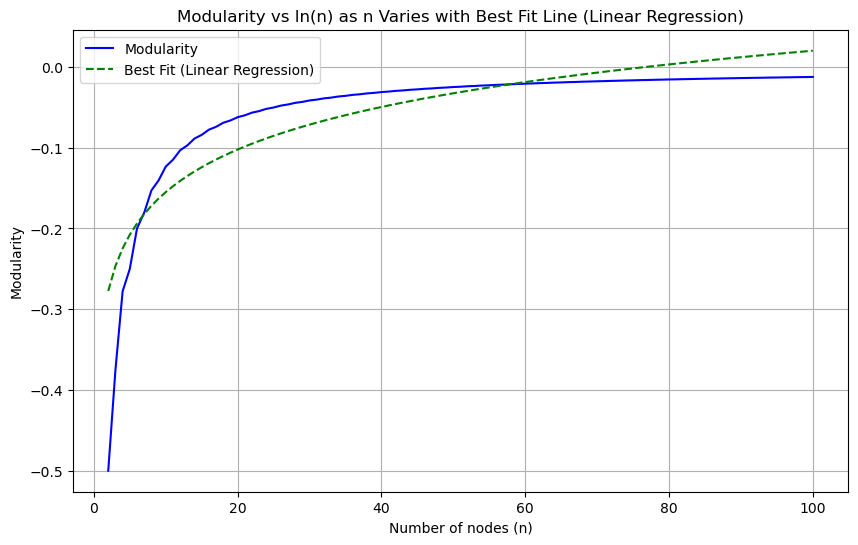

Linear Regression Parameters: Intercept = -0.3300679994428113, Coefficient = 0.07600790836829623


In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from networkx.algorithms.community import modularity

# Function to generate a binary tree with n nodes
def generate_binary_tree(n):
    G = nx.Graph()
    G.add_node(0)  # Root node
    nodes = [0]
    for i in range(1, n):
        parent = nodes[(i - 1) // 2]  # Parent of node i in binary tree
        G.add_edge(i, parent)  # Add edge between node i and its parent
        nodes.append(i)
    return G

# Function to calculate modularity for a binary tree
def calculate_modularity(G):
    # Since it's a binary tree, we use each node as its own community
    communities = [{node} for node in G.nodes()]
    return modularity(G, communities)

# Range for n
n_values = range(2, 101)  # You can adjust this range for larger n
modularity_values = []
ln_values = []

# Calculate modularity and ln(n) for each n
for n in n_values:
    tree = generate_binary_tree(n)
    mod = calculate_modularity(tree)
    modularity_values.append(mod)
    ln_values.append(np.log(n))

# Reshape data for linear regression
X = np.array(ln_values).reshape(-1, 1)  # Independent variable (ln(n))
y = np.array(modularity_values)  # Dependent variable (modularity)

# Apply Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Predict modularity using the linear regression model
y_pred = linear_regressor.predict(X)

# Plot both functions
plt.figure(figsize=(10, 6))
plt.plot(n_values, modularity_values, label="Modularity", color="b")
plt.plot(n_values, y_pred, label="Best Fit (Linear Regression)", color="g", linestyle="--")
plt.title('Modularity vs ln(n) as n Varies with Best Fit Line (Linear Regression)')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Modularity')
plt.legend()
plt.grid(True)
plt.show()

# Display regression parameters
print(f"Linear Regression Parameters: Intercept = {linear_regressor.intercept_}, Coefficient = {linear_regressor.coef_[0]}")


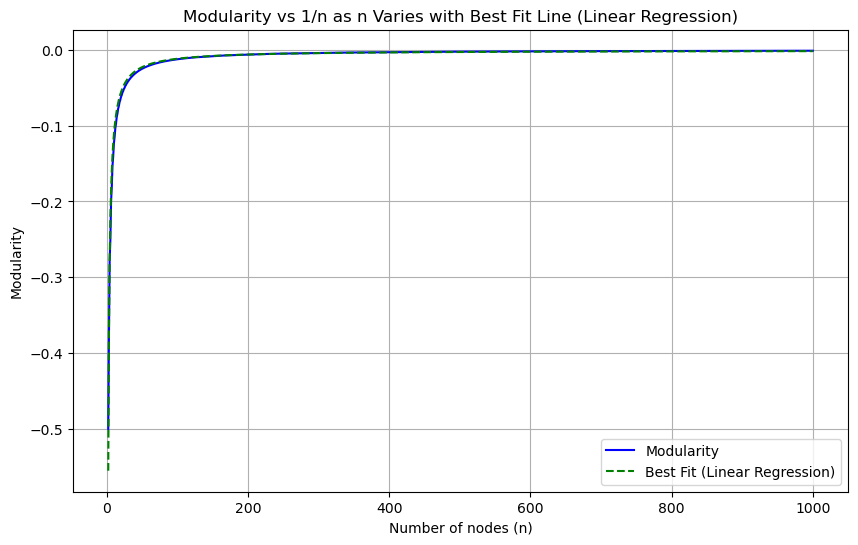

Linear Regression Parameters: Intercept = -0.000712335830451963, Coefficient = -1.1088988805045492


In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from networkx.algorithms.community import modularity

# Function to generate a binary tree with n nodes
def generate_binary_tree(n):
    G = nx.Graph()
    G.add_node(0)  # Root node
    nodes = [0]
    for i in range(1, n):
        parent = nodes[(i - 1) // 2]  # Parent of node i in binary tree
        G.add_edge(i, parent)  # Add edge between node i and its parent
        nodes.append(i)
    return G

# Function to calculate modularity for a binary tree
def calculate_modularity(G):
    # Since it's a binary tree, we use each node as its own community
    communities = [{node} for node in G.nodes()]
    return modularity(G, communities)

# Range for n
n_values = range(2, 1001)  # You can adjust this range for larger n
modularity_values = []
inv_n_values = []

# Calculate modularity and 1/n for each n
for n in n_values:
    tree = generate_binary_tree(n)
    mod = calculate_modularity(tree)
    modularity_values.append(mod)
    inv_n_values.append(1 / n)

# Reshape data for linear regression
X = np.array(inv_n_values).reshape(-1, 1)  # Independent variable (1/n)
y = np.array(modularity_values)  # Dependent variable (modularity)

# Apply Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

# Predict modularity using the linear regression model
y_pred = linear_regressor.predict(X)

# Plot both functions
plt.figure(figsize=(10, 6))
plt.plot(n_values, modularity_values, label="Modularity", color="b")
plt.plot(n_values, y_pred, label="Best Fit (Linear Regression)", color="g", linestyle="--")
plt.title('Modularity vs 1/n as n Varies with Best Fit Line (Linear Regression)')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Modularity')
plt.legend()
plt.grid(True)
plt.show()

# Display regression parameters
print(f"Linear Regression Parameters: Intercept = {linear_regressor.intercept_}, Coefficient = {linear_regressor.coef_[0]}")


In [ ]:
import networkx as nx
import numpy as np
from networkx.algorithms.community import modularity

# Function to generate a Cayley tree with branching factor z and g generations
def generate_cayley_tree(z, g):
    # z is the branching factor, and g is the number of generations
    G = nx.Graph()
    G.add_node(0)  # Add root node
    
    def add_edges(node, generation):
        if generation == g:  # Stop when we reach the desired number of generations
            return
        for i in range(z):  # Add z children to each node
            child = len(G.nodes())
            G.add_node(child)
            G.add_edge(node, child)
            add_edges(child, generation + 1)  # Recursively add edges for children

    add_edges(0, 0)  # Start recursion from the root node

    return G

# Function to calculate modularity for a Cayley tree
def calculate_modularity(G):
    # Define communities by generations (nodes at the same depth)
    communities = []
    depths = nx.single_source_shortest_path_length(G, 0)  # Find the depths of nodes
    max_depth = max(depths.values())  # Maximum depth of the tree

    # Group nodes by their depth (level in the tree)
    for i in range(max_depth + 1):
        community = {node for node, depth in depths.items() if depth == i}
        communities.append(community)
    
    # Calculate modularity
    return modularity(G, communities)

# Example: Generate Cayley tree with branching factor z=3 and g=4 generations
z = 10# Branching factor (degree)
g = 4  # Number of generations (levels)
G = generate_cayley_tree(z, g)

# Calculate modularity
mod = calculate_modularity(G)
print(f"Modularity of the Cayley tree with z={z} and g={g}: {mod}")


Modularity: 0.7449875746928512


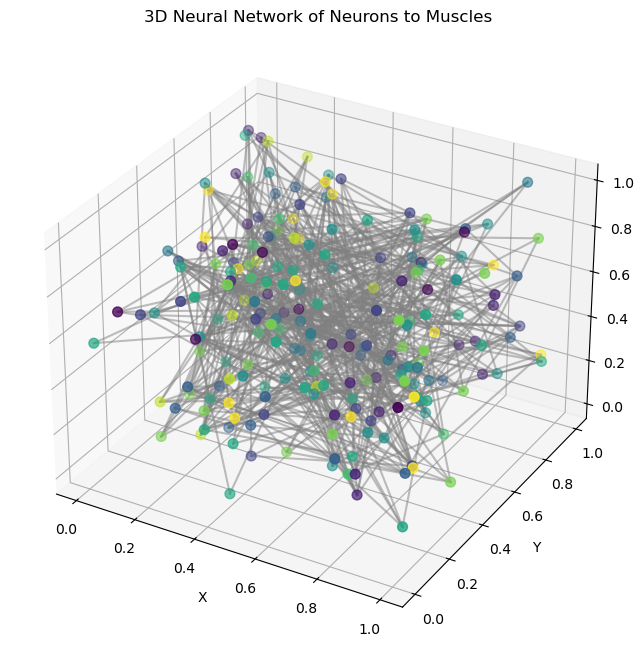

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from community import community_louvain  # For modularity calculation
import numpy as np
from matplotlib.animation import FuncAnimation

# Load the CSV file
file_path = "/Users/maitreyasameerganu/Desktop/Neurons_to_Muscles.csv"  # Path to your file
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges with weights (from "Number of Connections" column)
for _, row in data.iterrows():
    G.add_edge(row['Origin'], row['Muscle'], weight=row['Number of Connections'])

# Calculate modularity and communities using Louvain method
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

# Add community as a node attribute
nx.set_node_attributes(G, partition, 'community')

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate positions for nodes in 3D space
pos = {node: np.random.rand(3) for node in G.nodes()}  # Random positions for visualization
colors = [partition[node] for node in G.nodes()]  # Node colors based on community

# Draw the edges
for edge in G.edges():
    x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
    y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
    z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)  # Plot edges

# Draw the nodes
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]
node_z = [pos[node][2] for node in G.nodes()]
scatter = ax.scatter(node_x, node_y, node_z, c=colors, cmap=plt.cm.viridis, s=50)  # Plot nodes

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Neural Network of Neurons to Muscles")

# Function to update the view for rotation
def update(num):
    ax.view_init(elev=30, azim=num)  # Rotate the view

# Create the animation
ani = FuncAnimation(fig, update, frames=360, interval=50)  # 360 frames for a full rotation

# To display the animation in an interactive notebook, use plt.show()
# For saving the animation as a file, use ani.save('3d_rotation.mp4', writer='ffmpeg')
plt.show()


Modularity: 0.7500705040792831


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


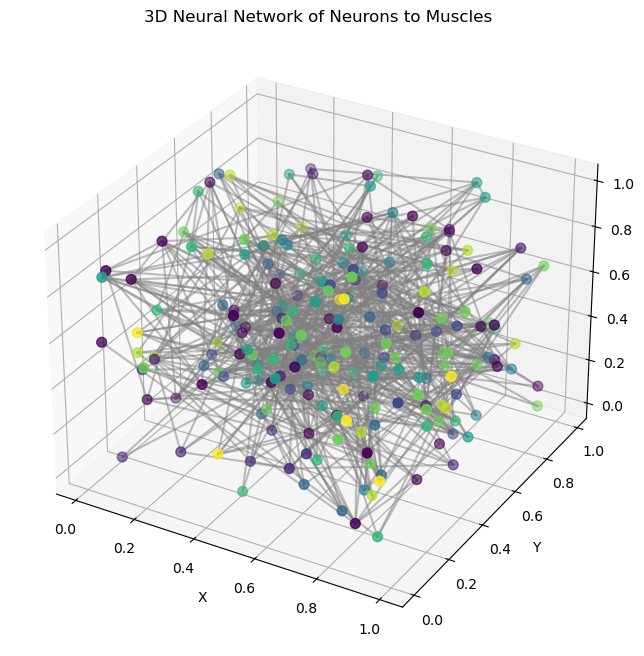

In [7]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from community import community_louvain  # For modularity calculation
import numpy as np
from matplotlib.animation import FuncAnimation

# Load the CSV file
file_path = "/Users/maitreyasameerganu/Desktop/Neurons_to_Muscles.csv"  # Path to your file
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges with weights (from "Number of Connections" column)
for _, row in data.iterrows():
    G.add_edge(row['Origin'], row['Muscle'], weight=row['Number of Connections'])

# Calculate modularity and communities using Louvain method
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

# Add community as a node attribute
nx.set_node_attributes(G, partition, 'community')

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate positions for nodes in 3D space
pos = {node: np.random.rand(3) for node in G.nodes()}  # Random positions for visualization
colors = [partition[node] for node in G.nodes()]  # Node colors based on community

# Draw the edges
for edge in G.edges():
    x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
    y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
    z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)  # Plot edges

# Draw the nodes
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]
node_z = [pos[node][2] for node in G.nodes()]
scatter = ax.scatter(node_x, node_y, node_z, c=colors, cmap=plt.cm.viridis, s=50)  # Plot nodes

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Neural Network of Neurons to Muscles")

# Function to update the view for rotation
def update(num):
    ax.view_init(elev=30, azim=num)  # Rotate the view

# Create the animation
ani = FuncAnimation(fig, update, frames=360, interval=50, blit=False)  # 360 frames for a full rotation

# Display the plot
plt.show()


Modularity: 0.758265566471246


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


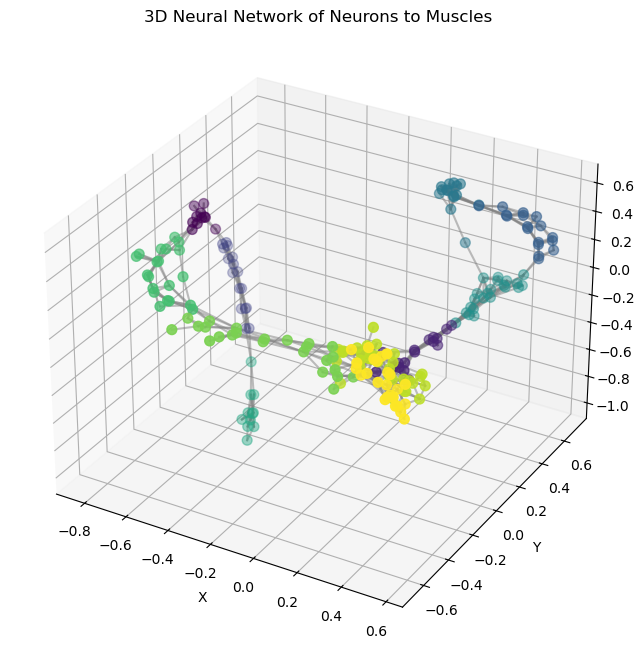

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import community as community_louvain  # Ensure you use python-louvain

# Load the CSV file
file_path = "/Users/maitreyasameerganu/Desktop/3D_coordinates_celegans.csv "  # Replace with your actual file path
data = pd.read_csv(file_path)

# Strip any leading/trailing whitespace from the column names
data.columns = data.columns.str.strip()

# Check the updated column names
print("Updated Columns:", data.columns)

# Create a graph
G = nx.Graph()

# Add nodes to the graph with positions as attributes
for _, row in data.iterrows():
    G.add_node(row['Name'], pos=(row['x'], row['y'], row['z']))

# Optional: Add edges based on some criteria (e.g., distance between nodes)
threshold_distance = 5.0  # Set your desired threshold for edge creation
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 != node2:
            pos1 = np.array(G.nodes[node1]['pos'])
            pos2 = np.array(G.nodes[node2]['pos'])
            distance = np.linalg.norm(pos1 - pos2)  # Euclidean distance
            if distance < threshold_distance:
                G.add_edge(node1, node2, weight=distance)

# Plotting the graph in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract positions for nodes
pos = nx.get_node_attributes(G, 'pos')
x_vals = [pos[node][0] for node in G.nodes]
y_vals = [pos[node][1] for node in G.nodes]
z_vals = [pos[node][2] for node in G.nodes]

# Plot the edges
for edge in G.edges():
    x_coords = [pos[edge[0]][0], pos[edge[1]][0]]
    y_coords = [pos[edge[0]][1], pos[edge[1]][1]]
    z_coords = [pos[edge[0]][2], pos[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)

# Plot the nodes
ax.scatter(x_vals, y_vals, z_vals, c='r', s=50)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D Network Visualization")

# Display the plot
plt.show()

# Perform modularity analysis using Louvain's method
partition = community_louvain.best_partition(G)  # This should work now

# Compute the modularity score
modularity_score = community_louvain.modularity(partition, G)
print("Modularity Score:", modularity_score)
